## Fine-Tuned Multi-Class Modeling using Train-Test-Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# make a list of new column names 
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']

# read in modeling datafile and rename columns 
df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
# create new target by combining Y1 and Y2 
# this target is used for the multi-class modeling 
df['Y']=df['Y1']+df['Y2']
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,Y1,Y2,Y
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0


In [4]:
# drop the original targets Y1 and Y2 
df=df.drop(['Y1','Y2'],axis=1)
df[df.Y==1].head(2)
df.to_csv('data/multiclass_modeling.csv',index=0)

In [5]:
# Split data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [6]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019, max_depth=29, max_features=70)
# fit model 
dt = dt.fit(X_train_resample,Y_train_resample)
# predict target 
Y_pred = dt.predict(X_test)

# print F1 score for the decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7875027507491834
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5612
           1       0.83      0.81      0.82      8692
           2       0.18      0.21      0.20      1532

    accuracy                           0.78     15836
   macro avg       0.64      0.64      0.64     15836
weighted avg       0.79      0.78      0.79     15836

[[5035  376  201]
 [ 396 7025 1271]
 [ 165 1040  327]]


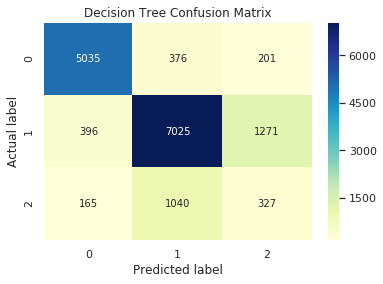

In [7]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/mm_tweaked_dt_cnfm.PNG')

In [8]:
# define the decision tree feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp[:10]

f12    0.255890
f25    0.138571
f3     0.126865
f2     0.051082
f1     0.040016
f0     0.039126
f24    0.032688
f23    0.029560
f77    0.029110
f11    0.018259
dtype: float64

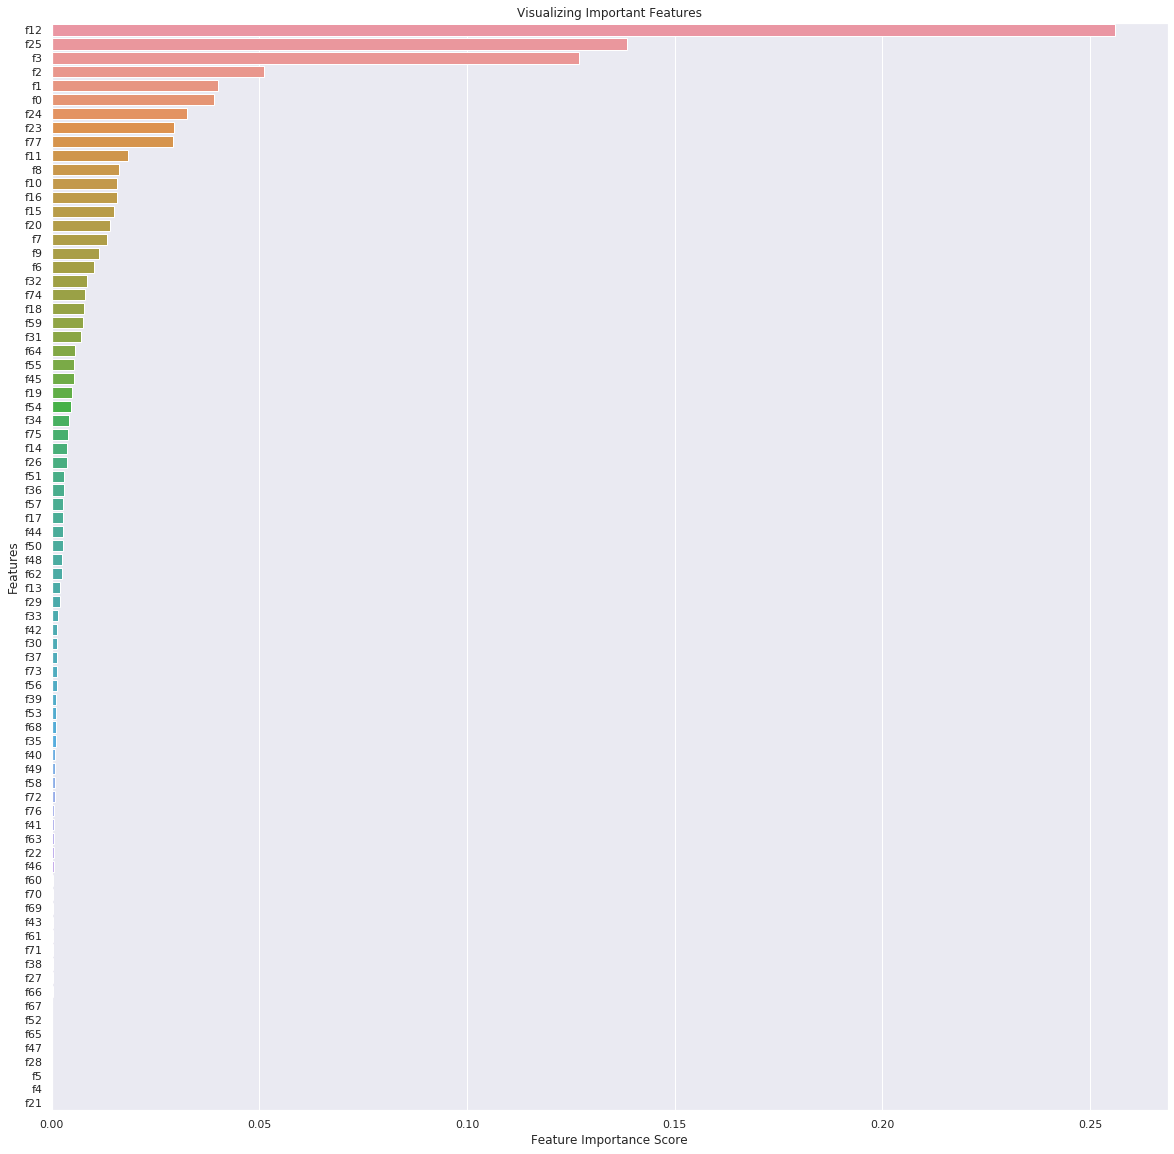

<Figure size 432x288 with 0 Axes>

In [9]:
# visualize the decision tree feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure 
plt.savefig('images/tweaked_mm_tt_dt_feature_importance.PNG')

### 2. XGBoost

In [10]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, max_depth=25, learning_rate=0.1, colsample_bytree=0.4, random_state=2019)
# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 
# predict target 
Y_pred=xg.predict(X_test)

# print F1 score for xgboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8222195570073928
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5612
           1       0.85      0.90      0.87      8692
           2       0.24      0.13      0.17      1532

    accuracy                           0.84     15836
   macro avg       0.67      0.66      0.66     15836
weighted avg       0.81      0.84      0.82     15836

[[5269  266   77]
 [ 326 7792  574]
 [ 174 1156  202]]


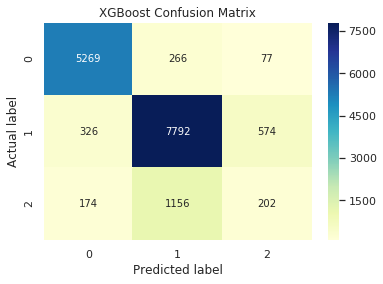

In [11]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/mm_tweaked_xgb_cnfm.PNG')

In [12]:
# define the xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp[:10]

f12    0.878787
f25    0.020809
f22    0.012970
f77    0.006843
f14    0.005804
f59    0.003828
f20    0.001912
f10    0.001605
f19    0.001511
f3     0.001508
dtype: float32

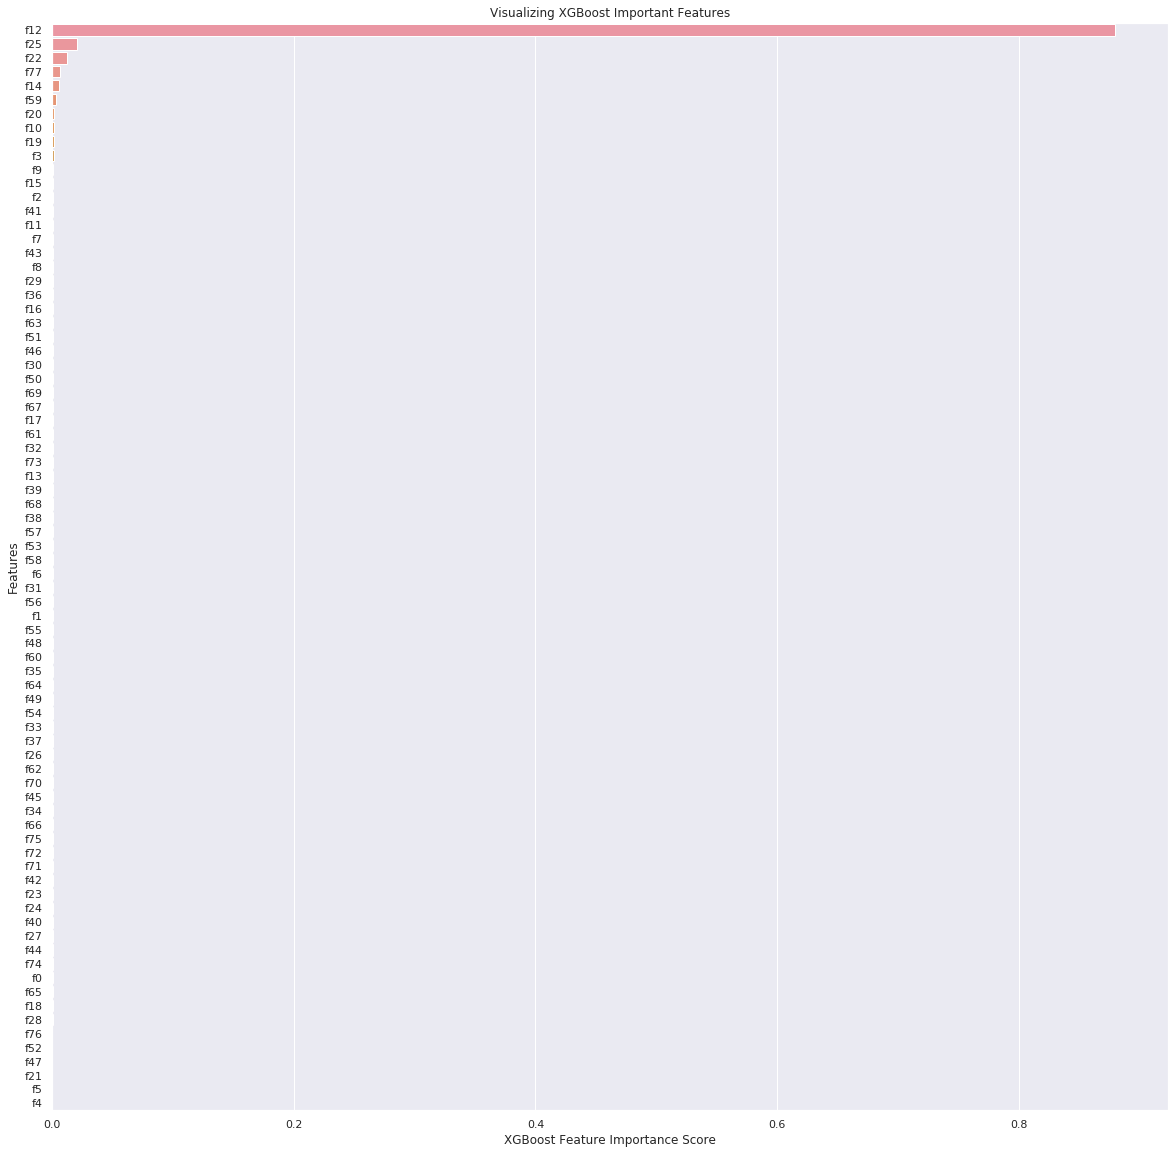

<Figure size 432x288 with 0 Axes>

In [13]:
# visualize the adaboost feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=xgb_feature_imp.index, x=xgb_feature_imp)

# Add labels & title 
plt.xlabel('XGBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing XGBoost Important Features")
plt.show()

# save figure 
plt.savefig('images/tweaked_mm_tt_xgb_feature_importance.PNG')

## 3. Random Forest

In [14]:
# build random forest model 
rf = RandomForestClassifier(n_estimators=100, max_depth=23, min_samples_split=5,
                            min_samples_leaf=1, max_features=35, random_state=2019)
# fit model 
rf = rf.fit(X_train_resample, Y_train_resample)
# predict the target 
Y_pred = rf.predict(X_test)

# print F1 score for the random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8212508006712126
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5612
           1       0.85      0.88      0.86      8692
           2       0.25      0.17      0.20      1532

    accuracy                           0.83     15836
   macro avg       0.67      0.66      0.66     15836
weighted avg       0.81      0.83      0.82     15836

[[5298  225   89]
 [ 381 7612  699]
 [ 179 1091  262]]


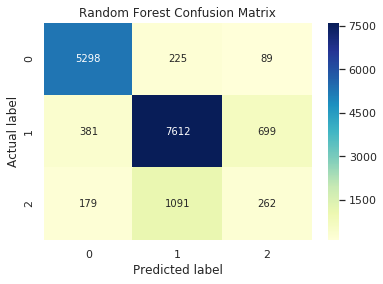

In [15]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# save figure to a png file 
plt.savefig('images/mm_tweaked_rf_cnfm.PNG')

In [16]:
# define the random forest feature importance variable
rf_feature_imp = pd.Series(rf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
rf_feature_imp[:10]

f12    0.220538
f3     0.119324
f77    0.089609
f25    0.082979
f2     0.053484
f0     0.041116
f1     0.041037
f22    0.029680
f24    0.028498
f23    0.028398
dtype: float64

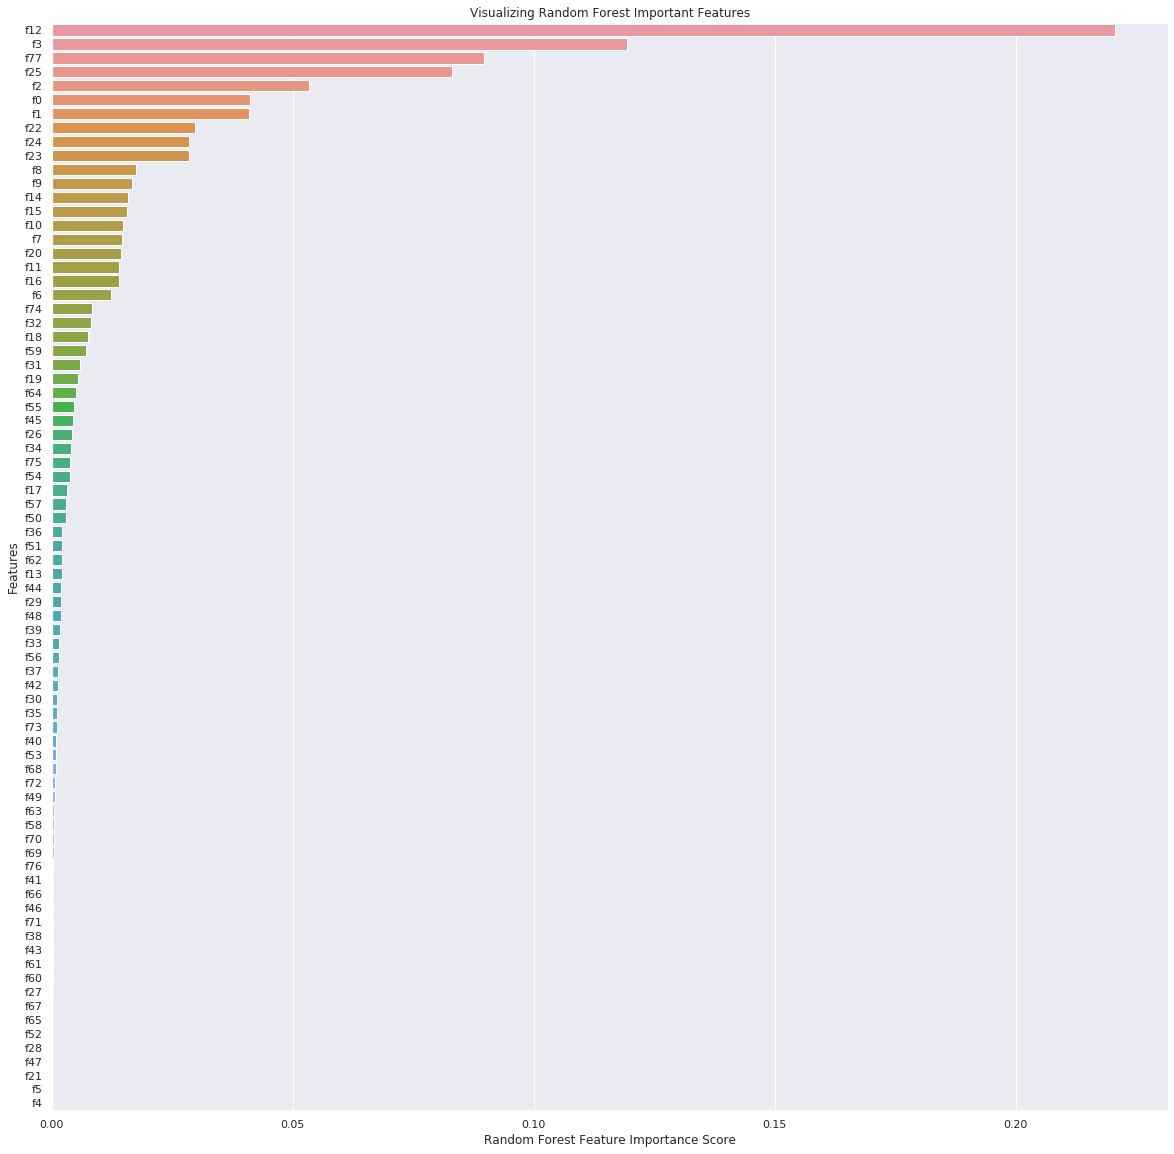

<Figure size 432x288 with 0 Axes>

In [17]:
# visualize the random forest feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rf_feature_imp.index, x=rf_feature_imp)

# Add labels & title 
plt.xlabel('Random Forest Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

# save figure
plt.savefig('images/tweaked_mm_tt_rf_feature_importance.PNG')